# Dropout Notebook


#### Prerequisite
* Regularization

***What will we cover in this notebook?***

* Explain dropout in nn
* Implementation in PyTorch
-----
1. What is dropout and why do we need it? What was the idea behind it?
2. How is dropout similar to ensembling a large variety of neural network architectures?
3. Implementation in PyTorch on a basic neural network
4. Visualising the difference between the non-dropout and dropout implemented models

### 1. What was the idea behind Dropout?
   * explain why we need dropout? Which problem leads us to do dropout
   * show a dropout example on a basic neural network
   * explain dropout parameters
   * important aspects of dropout
    

### 2. Similarity between dropout and ensembles methods
   * explain what the ensemble method is
   * list the similary between them
   * what makes dropout unique

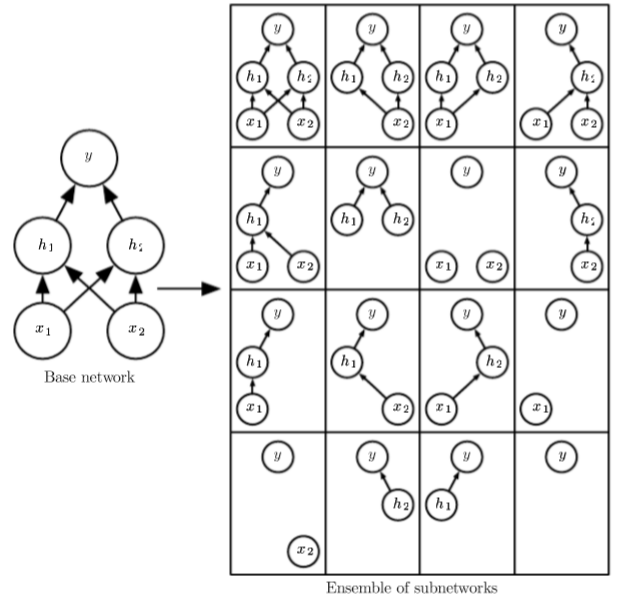

### 3. Implementation in PyTorch on a basic neural network 
* Copy the code in Neural Network Repo
* Implement dropout method

### 4. Visualizing the difference between a non-dropout and dropout implemented nn
* Copy the nn repo model performance metrics etc
* Explain the metrics used
* Evaluate the dropout model
* Compare training curves
* Compare model performance metrics

### 5. Summary
***List the key points like:***

* dropout definition in a sentence
* ensemble method
* how to overcome overfitting after applying dropout, show model performance metrics

### 6. What to do next?
* Challenge about dropout, search on net, 3 example

In [1]:
# test